# ANN for Classification 


2025-07-08 13:11:38,409 - INFO - Loading breast cancer dataset
2025-07-08 13:11:38,443 - INFO - Splitting data into training and testing sets
2025-07-08 13:11:38,449 - INFO - Standardizing features
2025-07-08 13:11:38,467 - INFO - Creating ANN model

2025-07-08 13:11:38,997 - WARNING - From C:\Users\faculty pc\anaconda3\Lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2025-07-08 13:11:39,719 - INFO - Compiling model
2025-07-08 13:11:39,768 - INFO - Training model
Epoch 1/50

2025-07-08 13:11:41,369 - WARNING - From C:\Users\faculty pc\anaconda3\Lib\site-packages\keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.


2025-07-08 13:11:42,440 - WARNING - From C:\Users\faculty pc\anaconda3\Lib\site-packages\keras\src\engine\base_layer_utils.py:384: The name tf.executing_eagerly_outside_functions is deprecated.

<Figure size 800x600 with 0 Axes>

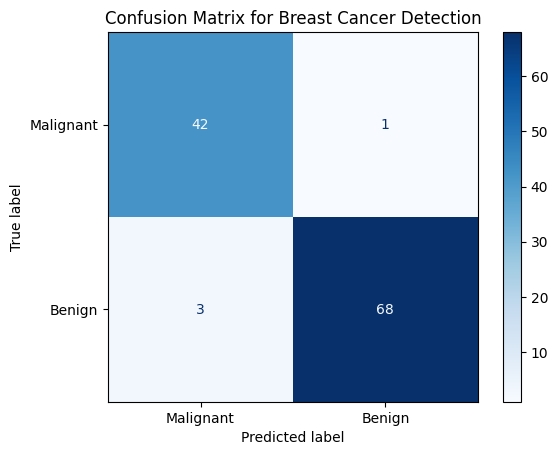


Confusion Matrix:
True Negatives (Malignant): 42
False Positives (Malignant predicted as Benign): 1
False Negatives (Benign predicted as Malignant): 3
True Positives (Benign): 68
2025-07-08 13:11:54,787 - INFO - Confusion Matrix - TN: 42, FP: 1, FN: 3, TP: 68
2025-07-08 13:11:54,789 - INFO - Plotting training history


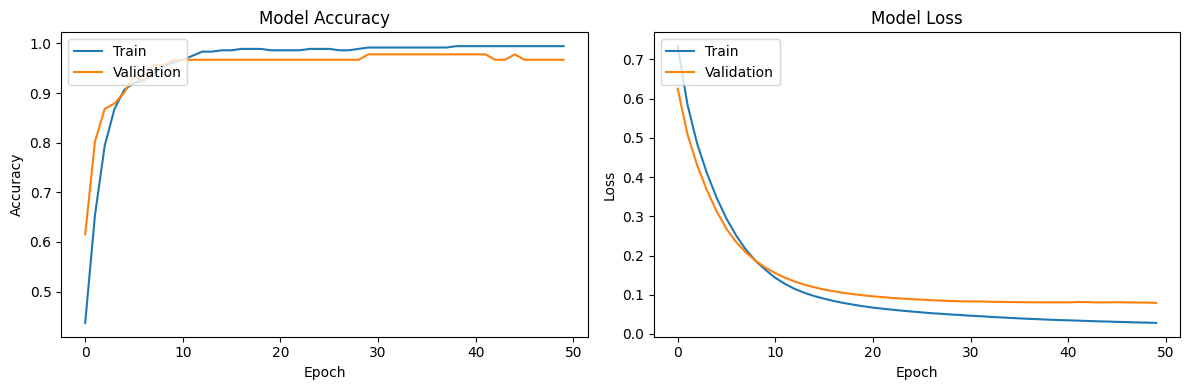

2025-07-08 13:11:55,816 - INFO - Displaying sample predictions

Sample predictions (first 10 samples):
Sample 1: Predicted: 1, Actual: 1
2025-07-08 13:11:55,817 - INFO - Sample 1: Predicted: 1, Actual: 1
Sample 2: Predicted: 0, Actual: 0
2025-07-08 13:11:55,818 - INFO - Sample 2: Predicted: 0, Actual: 0
Sample 3: Predicted: 0, Actual: 0
2025-07-08 13:11:55,819 - INFO - Sample 3: Predicted: 0, Actual: 0
Sample 4: Predicted: 1, Actual: 1
2025-07-08 13:11:55,821 - INFO - Sample 4: Predicted: 1, Actual: 1
Sample 5: Predicted: 1, Actual: 1
2025-07-08 13:11:55,823 - INFO - Sample 5: Predicted: 1, Actual: 1
Sample 6: Predicted: 0, Actual: 0
2025-07-08 13:11:55,825 - INFO - Sample 6: Predicted: 0, Actual: 0
Sample 7: Predicted: 0, Actual: 0
2025-07-08 13:11:55,829 - INFO - Sample 7: Predicted: 0, Actual: 0
Sample 8: Predicted: 0, Actual: 0
2025-07-08 13:11:55,831 - INFO - Sample 8: Predicted: 0, Actual: 0
Sample 9: Predicted: 0, Actual: 1
2025-07-08 13:11:55,834 - INFO - Sample 9: Predicted: 0

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import logging
import sys

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('breast_cancer_ann.log'),
        logging.StreamHandler(sys.stdout)
    ]
)
logger = logging.getLogger(__name__)

try:
    # Load the breast cancer dataset
    logger.info("Loading breast cancer dataset")
    data = load_breast_cancer()
    X = data.data
    y = data.target
except Exception as e:
    logger.error(f"Failed to load dataset: {str(e)}")
    raise

try:
    # Split the data into training and testing sets
    logger.info("Splitting data into training and testing sets")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
except Exception as e:
    logger.error(f"Failed to split data: {str(e)}")
    raise

try:
    # Standardize the features
    logger.info("Standardizing features")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
except Exception as e:
    logger.error(f"Failed to standardize features: {str(e)}")
    raise

try:
    # Create the ANN model
    logger.info("Creating ANN model")
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
except Exception as e:
    logger.error(f"Failed to create model: {str(e)}")
    raise

try:
    # Compile the model
    logger.info("Compiling model")
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
except Exception as e:
    logger.error(f"Failed to compile model: {str(e)}")
    raise

try:
    # Train the model
    logger.info("Training model")
    history = model.fit(X_train, y_train, 
                        epochs=50, 
                        batch_size=32, 
                        validation_split=0.2,
                        verbose=1)
except Exception as e:
    logger.error(f"Failed to train model: {str(e)}")
    raise

try:
    # Evaluate the model
    logger.info("Evaluating model")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    logger.info(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"\nTest Accuracy: {test_accuracy:.4f}")
except Exception as e:
    logger.error(f"Failed to evaluate model: {str(e)}")
    raise

try:
    # Make predictions on test set
    logger.info("Making predictions")
    predictions = (model.predict(X_test) > 0.5).astype(int).ravel()
except Exception as e:
    logger.error(f"Failed to make predictions: {str(e)}")
    raise

try:
    # Generate and plot confusion matrix
    logger.info("Generating confusion matrix")
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix for Breast Cancer Detection')
    plt.show()
    
    # Print confusion matrix values
    print("\nConfusion Matrix:")
    print(f"True Negatives (Malignant): {cm[0,0]}")
    print(f"False Positives (Malignant predicted as Benign): {cm[0,1]}")
    print(f"False Negatives (Benign predicted as Malignant): {cm[1,0]}")
    print(f"True Positives (Benign): {cm[1,1]}")
    logger.info(f"Confusion Matrix - TN: {cm[0,0]}, FP: {cm[0,1]}, FN: {cm[1,0]}, TP: {cm[1,1]}")
except Exception as e:
    logger.error(f"Failed to generate confusion matrix: {str(e)}")
    raise

try:
    # Plot training history
    logger.info("Plotting training history")
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()
except Exception as e:
    logger.error(f"Failed to plot training history: {str(e)}")
    raise

try:
    # Sample predictions
    logger.info("Displaying sample predictions")
    print("\nSample predictions (first 10 samples):")
    for i in range(10):
        print(f"Sample {i+1}: Predicted: {predictions[i]}, Actual: {y_test[i]}")
        logger.info(f"Sample {i+1}: Predicted: {predictions[i]}, Actual: {y_test[i]}")
except Exception as e:
    logger.error(f"Failed to display sample predictions: {str(e)}")
    raise

logger.info("Program completed successfully")

In [5]:
input_shape=(X_train.shape[1],)

print(input_shape)
print(X_train)

(30,)
[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]


# Regression ANN Model

2025-07-08 09:57:11,982 - INFO - Loading breast cancer dataset
2025-07-08 09:57:12,028 - INFO - Splitting data into training and testing sets
2025-07-08 09:57:12,044 - INFO - Standardizing features
2025-07-08 09:57:12,044 - INFO - Creating ANN regression model
2025-07-08 09:57:12,159 - INFO - Compiling model
2025-07-08 09:57:12,161 - INFO - Training model
Epoch 1/50
12/12 [==============================] - 1s 21ms/step - loss: 231.9190 - mean_absolute_error: 14.7945 - val_loss: 238.0043 - val_mean_absolute_error: 14.8625
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 223.8419 - mean_absolute_error: 14.5330 - val_loss: 231.1659 - val_mean_absolute_error: 14.6520
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 217.9013 - mean_absolute_error: 14.3375 - val_loss: 225.9231 - val_mean_absolute_error: 14.4884
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 213.2993 - mean_absolute_error: 14.1817 - val_loss: 221.5410 - va

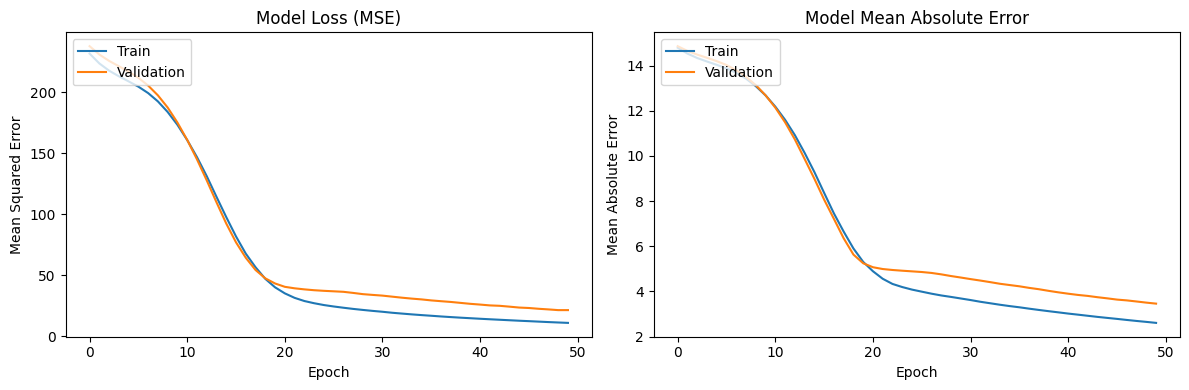

2025-07-08 09:57:17,628 - INFO - Plotting predicted vs actual values


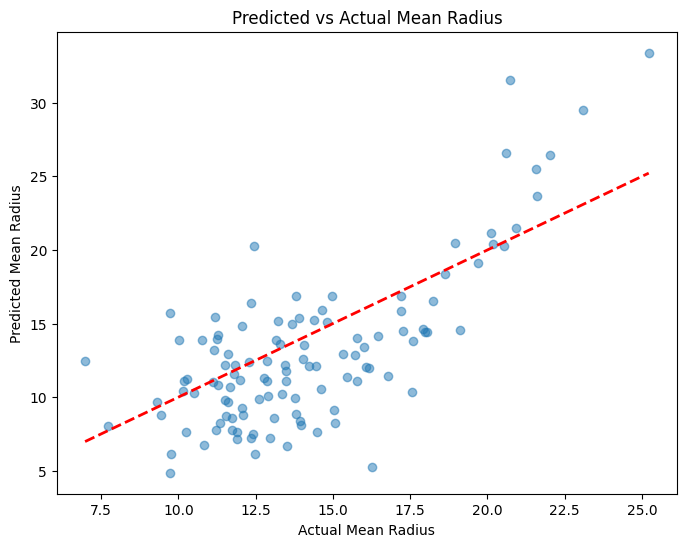

2025-07-08 09:57:17,886 - INFO - Displaying sample predictions

Sample predictions (first 10 samples):
Sample 1: Predicted: 6.1531, Actual: 12.4700
2025-07-08 09:57:17,887 - INFO - Sample 1: Predicted: 6.1531, Actual: 12.4700
Sample 2: Predicted: 20.4529, Actual: 18.9400
2025-07-08 09:57:17,889 - INFO - Sample 2: Predicted: 20.4529, Actual: 18.9400
Sample 3: Predicted: 11.3898, Actual: 15.4600
2025-07-08 09:57:17,890 - INFO - Sample 3: Predicted: 11.3898, Actual: 15.4600
Sample 4: Predicted: 7.4908, Actual: 12.4000
2025-07-08 09:57:17,891 - INFO - Sample 4: Predicted: 7.4908, Actual: 12.4000
Sample 5: Predicted: 8.7390, Actual: 11.5400
2025-07-08 09:57:17,893 - INFO - Sample 5: Predicted: 8.7390, Actual: 11.5400
Sample 6: Predicted: 26.5895, Actual: 20.6000
2025-07-08 09:57:17,895 - INFO - Sample 6: Predicted: 26.5895, Actual: 20.6000
Sample 7: Predicted: 26.4773, Actual: 22.0100
2025-07-08 09:57:17,896 - INFO - Sample 7: Predicted: 26.4773, Actual: 22.0100
Sample 8: Predicted: 10.3700

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import logging
import sys

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('breast_cancer_regression_ann.log'),
        logging.StreamHandler(sys.stdout)
    ]
)
logger = logging.getLogger(__name__)

try:
    # Load the breast cancer dataset
    logger.info("Loading breast cancer dataset")
    data = load_breast_cancer()
    X = data.data[:, 1:]  # Use all features except mean radius
    y = data.data[:, 0]   # Use mean radius as the regression target
except Exception as e:
    logger.error(f"Failed to load dataset: {str(e)}")
    raise

try:
    # Split the data into training and testing sets
    logger.info("Splitting data into training and testing sets")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
except Exception as e:
    logger.error(f"Failed to split data: {str(e)}")
    raise

try:
    # Standardize the features
    logger.info("Standardizing features")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
except Exception as e:
    logger.error(f"Failed to standardize features: {str(e)}")
    raise

try:
    # Create the ANN model for regression
    logger.info("Creating ANN regression model")
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')  # Linear activation for regression
    ])
except Exception as e:
    logger.error(f"Failed to create model: {str(e)}")
    raise

try:
    # Compile the model
    logger.info("Compiling model")
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
except Exception as e:
    logger.error(f"Failed to compile model: {str(e)}")
    raise

try:
    # Train the model
    logger.info("Training model")
    history = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)
except Exception as e:
    logger.error(f"Failed to train model: {str(e)}")
    raise

try:
    # Evaluate the model
    logger.info("Evaluating model")
    predictions = model.predict(X_test).ravel()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    logger.info(f"Test Mean Squared Error: {mse:.4f}")
    logger.info(f"Test R² Score: {r2:.4f}")
    print(f"\nTest Mean Squared Error: {mse:.4f}")
    print(f"Test R² Score: {r2:.4f}")
except Exception as e:
    logger.error(f"Failed to evaluate model: {str(e)}")
    raise

try:
    # Plot training history
    logger.info("Plotting training history")
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss (MSE)')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation mean absolute error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()
except Exception as e:
    logger.error(f"Failed to plot training history: {str(e)}")
    raise

try:
    # Plot predicted vs actual values
    logger.info("Plotting predicted vs actual values")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5)  # Fixed: Changed Y_test to y_test
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Mean Radius')
    plt.ylabel('Predicted Mean Radius')
    plt.title('Predicted vs Actual Mean Radius')
    plt.show()
except Exception as e:
    logger.error(f"Failed to plot predicted vs actual values: {str(e)}")
    raise

try:
    # Sample predictions
    logger.info("Displaying sample predictions")
    print("\nSample predictions (first 10 samples):")
    for i in range(10):
        print(f"Sample {i+1}: Predicted: {predictions[i]:.4f}, Actual: {y_test[i]:.4f}")
        logger.info(f"Sample {i+1}: Predicted: {predictions[i]:.4f}, Actual: {y_test[i]:.4f}")
except Exception as e:
    logger.error(f"Failed to display sample predictions: {str(e)}")
    raise

logger.info("Program completed successfully")

2025-07-08 10:24:30,594 - INFO - Loading breast cancer dataset
2025-07-08 10:24:30,635 - INFO - Splitting data into training and testing sets
2025-07-08 10:24:30,638 - INFO - Standardizing features
2025-07-08 10:24:30,642 - INFO - Creating ANN regression model
2025-07-08 10:24:30,915 - INFO - Compiling model
2025-07-08 10:24:30,925 - INFO - Training model
Epoch 1/200
23/23 [==============================] - 3s 17ms/step - loss: 210.1647 - mean_absolute_error: 14.0260 - val_loss: 217.3752 - val_mean_absolute_error: 14.2347
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 206.4642 - mean_absolute_error: 13.9015 - val_loss: 215.7884 - val_mean_absolute_error: 14.1814
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 202.3457 - mean_absolute_error: 13.7561 - val_loss: 213.6800 - val_mean_absolute_error: 14.1073
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 196.6486 - mean_absolute_error: 13.5529 - val_loss: 210.7331 

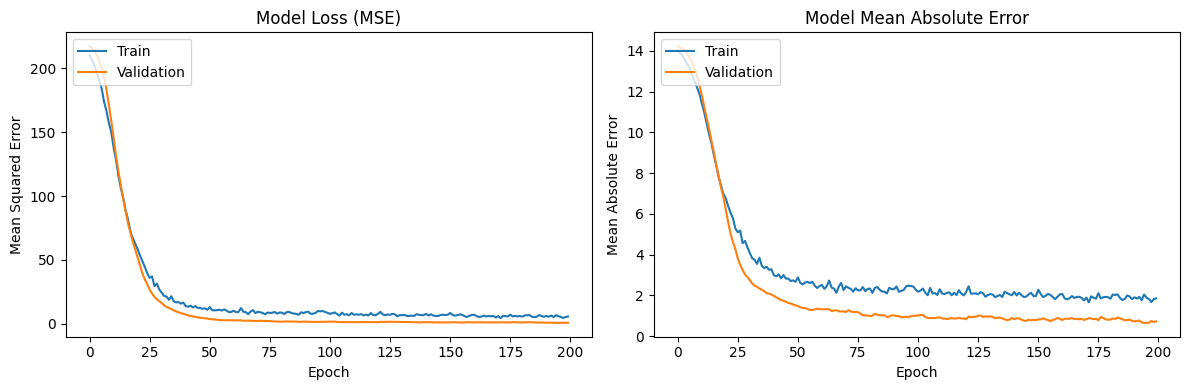

2025-07-08 10:25:00,770 - INFO - Plotting predicted vs actual values


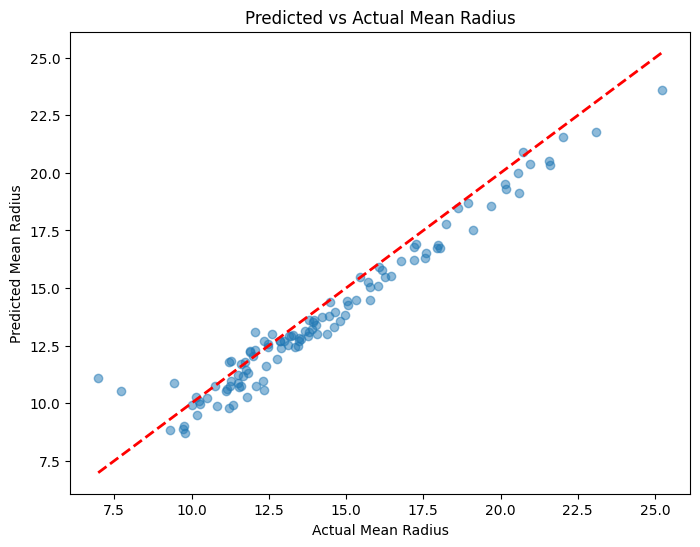

2025-07-08 10:25:01,028 - INFO - Displaying sample predictions

Sample predictions (first 10 samples):
Sample 1: Predicted: 12.5830, Actual: 12.4700
2025-07-08 10:25:01,028 - INFO - Sample 1: Predicted: 12.5830, Actual: 12.4700
Sample 2: Predicted: 18.7000, Actual: 18.9400
2025-07-08 10:25:01,043 - INFO - Sample 2: Predicted: 18.7000, Actual: 18.9400
Sample 3: Predicted: 15.4732, Actual: 15.4600
2025-07-08 10:25:01,043 - INFO - Sample 3: Predicted: 15.4732, Actual: 15.4600
Sample 4: Predicted: 11.6064, Actual: 12.4000
2025-07-08 10:25:01,043 - INFO - Sample 4: Predicted: 11.6064, Actual: 12.4000
Sample 5: Predicted: 10.7220, Actual: 11.5400
2025-07-08 10:25:01,043 - INFO - Sample 5: Predicted: 10.7220, Actual: 11.5400
Sample 6: Predicted: 19.1360, Actual: 20.6000
2025-07-08 10:25:01,043 - INFO - Sample 6: Predicted: 19.1360, Actual: 20.6000
Sample 7: Predicted: 21.5698, Actual: 22.0100
2025-07-08 10:25:01,043 - INFO - Sample 7: Predicted: 21.5698, Actual: 22.0100
Sample 8: Predicted: 1

In [18]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import logging
import sys

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('breast_cancer_regression_ann_optimized.log'),
        logging.StreamHandler(sys.stdout)
    ]
)
logger = logging.getLogger(__name__)

try:
    # Load the breast cancer dataset
    logger.info("Loading breast cancer dataset")
    data = load_breast_cancer()
    X = data.data[:, 1:]  # Use all features except mean radius
    y = data.data[:, 0]   # Use mean radius as the regression target
except Exception as e:
    logger.error(f"Failed to load dataset: {str(e)}")
    raise

try:
    # Split the data into training and testing sets
    logger.info("Splitting data into training and testing sets")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
except Exception as e:
    logger.error(f"Failed to split data: {str(e)}")
    raise

try:
    # Standardize the features
    logger.info("Standardizing features")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
except Exception as e:
    logger.error(f"Failed to standardize features: {str(e)}")
    raise

try:
    # Create the ANN model for regression
    logger.info("Creating ANN regression model")
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')  # Linear activation for regression
    ])
except Exception as e:
    logger.error(f"Failed to create model: {str(e)}")
    raise

try:
    # Compile the model
    logger.info("Compiling model")
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
except Exception as e:
    logger.error(f"Failed to compile model: {str(e)}")
    raise

try:
    # Train the model
    logger.info("Training model")
    history = model.fit(X_train, y_train,
                        epochs=200,  # Increased epochs
                        batch_size=16,  # Smaller batch size
                        validation_split=0.2,
                        verbose=1)
except Exception as e:
    logger.error(f"Failed to train model: {str(e)}")
    raise

try:
    # Evaluate the model
    logger.info("Evaluating model")
    predictions = model.predict(X_test).ravel()
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    logger.info(f"Test Mean Squared Error: {mse:.4f}")
    logger.info(f"Test R² Score: {r2:.4f}")
    print(f"\nTest Mean Squared Error: {mse:.4f}")
    print(f"Test R² Score: {r2:.4f}")
except Exception as e:
    logger.error(f"Failed to evaluate model: {str(e)}")
    raise

try:
    # Plot training history
    logger.info("Plotting training history")
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss (MSE)')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation mean absolute error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()
except Exception as e:
    logger.error(f"Failed to plot training history: {str(e)}")
    raise

try:
    # Plot predicted vs actual values
    logger.info("Plotting predicted vs actual values")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Mean Radius')
    plt.ylabel('Predicted Mean Radius')
    plt.title('Predicted vs Actual Mean Radius')
    plt.show()
except Exception as e:
    logger.error(f"Failed to plot predicted vs actual values: {str(e)}")
    raise

try:
    # Sample predictions
    logger.info("Displaying sample predictions")
    print("\nSample predictions (first 10 samples):")
    for i in range(10):
        print(f"Sample {i+1}: Predicted: {predictions[i]:.4f}, Actual: {y_test[i]:.4f}")
        logger.info(f"Sample {i+1}: Predicted: {predictions[i]:.4f}, Actual: {y_test[i]:.4f}")
except Exception as e:
    logger.error(f"Failed to display sample predictions: {str(e)}")
    raise

logger.info("Program completed successfully")

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1920      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)               